In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from scipy import stats

from collections import Counter
from collections import defaultdict
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler

In [3]:
#df_train=pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")
#df_test=pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv")

df_train=pd.read_csv("../ravdess_features_train_pulito.csv")
df_test=pd.read_csv("../ravdess_features_test_pulito.csv")

''''
df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])
y_train=df_train.sex.values

X_train=df_train.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values
#X_train = df_train.values


df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])
y_test=df_test.sex.values

X_test=df_test.drop(columns=["emotion", "modality","emotional_intensity","statement","sex","vocal_channel","repetition","actor","filename"]).values
#X_test = df_test.values
'''

'\'\ndf_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])\ndf_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])\ndf_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])\ndf_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])\ndf_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])\ny_train=df_train.sex.values\n\nX_train=df_train.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values\n#X_train = df_train.values\n\n\ndf_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])\ndf_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])\ndf_test["sex"]=d

In [4]:
df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])

df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])

In [5]:
frames = [df_train, df_test]
df = pd.concat(frames)
X = df.drop(columns=["emotion",  "emotional_intensity","statement","vocal_channel","sex",]).values
X_unscaled = df.drop(columns=["emotion","emotional_intensity","statement","vocal_channel","sex",]).values
y=df.emotion.values

In [6]:
sel = SelectKBest(k=108)
X = sel.fit_transform(X, y)

In [7]:
features = sel.get_feature_names_out()
features = ([s.replace("x", "") for s in features])
df.T.iloc[features].T.head()

,vocal_channel,statement,sex,frame_count,sum,mean,q01,q05,q99,kur,...,zc_kur_w3,mfcc_sum_w3,mfcc_mean_w3,mfcc_q50_w3,stft_q25_w3,stft_skew_w3,length_w4,kur_w4,skew_w4,zc_std_w4
0,0.0,1.0,0.0,158558.0,0.145081,9.150000e-07,-0.012586,-0.005890,0.015272,15.028520,...,29.084377,-34356.484307,-22.023387,0.533580,0.234335,0.288573,39640.0,17.550783,0.465485,0.227131
1,0.0,1.0,0.0,160160.0,0.114319,7.137790e-07,-0.013550,-0.006104,0.015900,16.488415,...,28.231719,-33708.480180,-21.334481,-0.172550,0.209817,0.513204,40040.0,33.514234,-0.400318,0.198888
2,0.0,0.0,0.0,156956.0,0.149963,9.554485e-07,-0.015822,-0.007294,0.018494,17.035218,...,29.270049,-32972.110544,-21.410461,-0.237159,0.221506,0.474012,39239.0,19.702873,-0.976030,0.183175
3,0.0,0.0,0.0,152152.0,0.139618,9.176213e-07,-0.014923,-0.006714,0.017487,21.824521,...,29.023160,-31355.913512,-20.903942,0.444741,0.295453,0.239217,38038.0,18.295975,-0.169360,0.255206
4,0.0,1.0,0.0,169769.0,0.137665,8.108948e-07,-0.009399,-0.004364,0.011566,13.236022,...,28.060016,-36494.162399,-21.984435,-0.839454,0.189045,0.575065,42443.0,18.503776,0.139319,0.226439


In [8]:
X.shape

(2452, 108)

# data partitioning

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# Log Reg

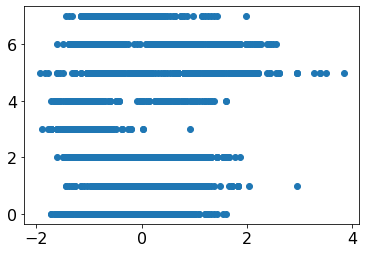

In [13]:
plt.scatter(X_train.T[0], y_train)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [15]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train.T[0].reshape(-1,1), y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = clf.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.19972826086956522
F1-score [0.21495327 0.17316017 0.         0.3255814  0.         0.36363636
 0.         0.        ]
              precision    recall  f1-score   support

           0       0.15      0.41      0.21       111
           1       0.15      0.20      0.17        99
           2       0.00      0.00      0.00       124
           3       0.29      0.37      0.33        57
           4       0.00      0.00      0.00        58
           5       0.28      0.52      0.36       115
           6       0.00      0.00      0.00       118
           7       0.00      0.00      0.00        54

    accuracy                           0.20       736
   macro avg       0.11      0.19      0.13       736
weighted avg       0.11      0.20      0.14       736



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
clf.intercept_

array([ 0.40062239,  0.46659767,  0.39703542, -1.43857065, -0.28847475,
        0.31016327,  0.38513333, -0.23250669])

In [18]:
clf.coef_

array([[-0.11722901],
       [ 0.45482577],
       [ 0.25161685],
       [-1.75850136],
       [-0.01966211],
       [ 0.72857449],
       [ 0.49821567],
       [-0.03784031]])

In [19]:
from scipy.special import expit

In [20]:
loss = expit(sorted(X_test.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train.T[0].reshape(-1,1), y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

ValueError: operands could not be broadcast together with shapes (736,1) (8,1) 